In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

 **# Import the dataset** 

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [4]:
columns = ['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Charges']
df.columns = columns

In [5]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [6]:
df.replace('?', np.nan, inplace=True)

**# Data wrangling**

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       2768 non-null   object 
 1   Sex       2772 non-null   int64  
 2   BMI       2772 non-null   float64
 3   Children  2772 non-null   int64  
 4   Smoker    2765 non-null   object 
 5   Region    2772 non-null   int64  
 6   Charges   2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [8]:
df.isna().sum()

Age         4
Sex         0
BMI         0
Children    0
Smoker      7
Region      0
Charges     0
dtype: int64

In [9]:
# Replace missing values in Age attribute with mean values : Countinous variable
mean_age = df['Age'].astype('float64').mean(axis=0)
df['Age'].replace(np.nan, mean_age, inplace=True)

# Replace missing values in Smoker attribute with the most frequent value : Categorical variable
is_smoker = df['Smoker'].value_counts().idxmax()
df['Smoker'].replace(np.nan, is_smoker, inplace=True)



C:\Users\Dell\AppData\Local\Temp\ipykernel_18092\848308956.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace(np.nan, mean_age, inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18092\848308956.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [10]:
df[['Age', 'Smoker']] = df[['Age', 'Smoker']].astype('int')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       2772 non-null   int64  
 1   Sex       2772 non-null   int64  
 2   BMI       2772 non-null   float64
 3   Children  2772 non-null   int64  
 4   Smoker    2772 non-null   int64  
 5   Region    2772 non-null   int64  
 6   Charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


In [11]:
df['Charges'].round(2)

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
2767     8569.86
2768     2020.18
2769    16450.89
2770    21595.38
2771     9850.43
Name: Charges, Length: 2772, dtype: float64

**# Exploratory data analysis**

(0.0, 66902.8557155)

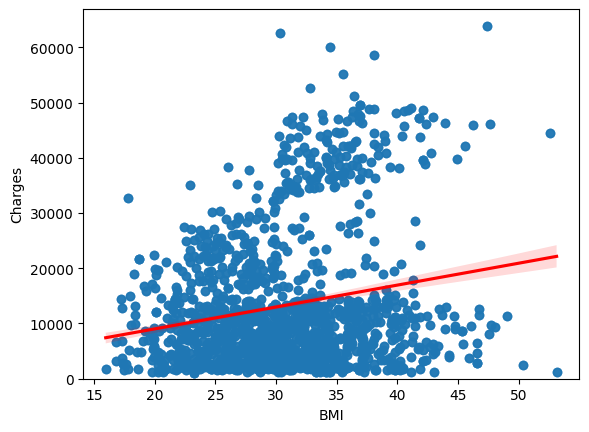

In [12]:
sns.regplot(x="BMI", y="Charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='Smoker', ylabel='Charges'>

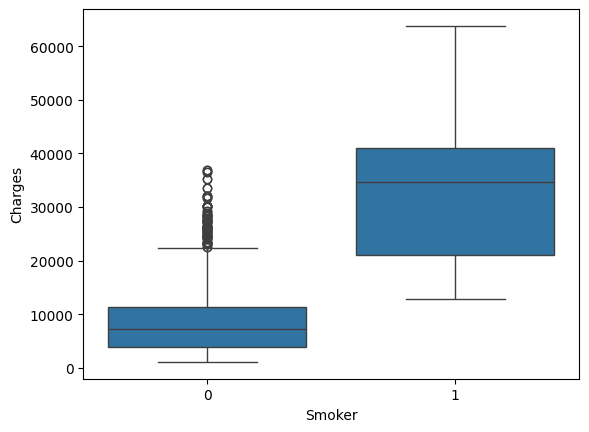

In [13]:
sns.boxplot(x='Smoker', y='Charges', data=df)

In [14]:
print(df.corr())

               Age       Sex       BMI  Children    Smoker    Region   Charges
Age       1.000000 -0.026046  0.113048  0.037574 -0.023286 -0.007167  0.298624
Sex      -0.026046  1.000000  0.042924  0.016020  0.082326  0.022213  0.062837
BMI       0.113048  0.042924  1.000000 -0.001492  0.011489  0.271119  0.199846
Children  0.037574  0.016020 -0.001492  1.000000  0.006362 -0.025717  0.066442
Smoker   -0.023286  0.082326  0.011489  0.006362  1.000000  0.054077  0.788783
Region   -0.007167  0.022213  0.271119 -0.025717  0.054077  1.000000  0.054058
Charges   0.298624  0.062837  0.199846  0.066442  0.788783  0.054058  1.000000


**# Model development**

In [15]:
X = df[['Smoker']]
y = df['Charges']
lr = LinearRegression()
lr.fit(X,y)
print(lr.score(X,y))

0.6221791718835359


In [16]:
Z = df[['Age', 'Sex' , 'BMI', 'Children', 'Smoker', 'Region']]
lr.fit(Z,y)
print(lr.score(Z,y))

0.7504083816310174


In [17]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures()), ('LinearReg', LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype('int')
pipe.fit(Z,y)
ypipe = pipe.predict(Z)
print(r2_score(y, ypipe))

0.845391551002638


**# Model Refinement**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(Z,y,test_size=0.2 ,random_state=1)

In [19]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
yhat = ridge.predict(X_test)
print(r2_score(yhat, y_test))

0.5876148974524965


In [20]:
polynomial = PolynomialFeatures(degree=2)
x_train_p = polynomial.fit_transform(X_train)
x_test_p = polynomial.fit_transform(X_test)
ridge.fit(x_train_p,y_train)
pred = ridge.predict(x_test_p)
print(r2_score(y_test, pred))

0.7836812857045463
